# Clustering | **Assignment**

### 1. What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.

#### Key Differences Between K-Means and Hierarchical Clustering

| Feature | **K-Means Clustering** | **Hierarchical Clustering** |
|--------|------------------------|-----------------------------|
| **Approach** | Partitioning: divides data into *k* flat clusters | Connectivity: builds a tree-like structure (dendrogram) |
| **Number of Clusters** | Must be specified beforehand | Determined by cutting the dendrogram at a chosen level |
| **Scalability** | Fast and efficient for large datasets | Slower, especially with large datasets (higher time complexity) |
| **Cluster Shape Assumption** | Assumes spherical, equally sized clusters | No strict shape assumption; more flexible |
| **Output** | Final cluster assignments and centroids | A hierarchy of clusters showing relationships |

---

#### Use Case for K-Means Clustering  
**Customer Segmentation in E-Commerce**  
Imagine an online store wants to group its users into 5 distinct segments based on purchase behavior, browsing patterns, and demographics. K-Means is perfect here because:
- The number of segments is known.
- The dataset is large.
- The goal is actionable insights like “frequent buyers” vs. “window shoppers.”

---

#### Use Case for Hierarchical Clustering  
**Gene Expression Analysis in Bioinformatics**  
Researchers studying gene behavior across different conditions use hierarchical clustering to:
- Group genes with similar expression patterns.
- Visualize relationships in a dendrogram.
- Discover gene families or co-regulated genes without needing to predefine the number of clusters.

### 2.  Explain the purpose of the Silhouette Score in evaluating clustering algorithms.

The **Silhouette Score** tells us how well our data points fit within their assigned clusters and how distinct those clusters are from each other.

---

#### What Is the Silhouette Score?

It measures **how similar a data point is to its own cluster** compared to other clusters. The score ranges from **-1 to +1**:

- **+1** → Perfectly matched to its own cluster and far from others  
- **0** → On the boundary between clusters  
- **-1** → Possibly assigned to the wrong cluster

---

#### Why It Matters

The Silhouette Score helps us:
- **Evaluate cluster quality** without needing ground truth labels (perfect for unsupervised learning)
- **Compare different clustering algorithms** or different values of *k* in K-Means
- **Avoid overfitting** by spotting when you've created too many tiny, meaningless clusters

---

#### How It’s Calculated (in simple terms)

For each data point:
- **a** = average distance to other points in the same cluster  
- **b** = average distance to points in the nearest neighboring cluster  
- **Silhouette Score** = \( \frac{b - a}{\max(a, b)} \)

Then we average this score across all data points.

### 3. What are the core parameters of DBSCAN, and how do they influence the clustering process?

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a powerful unsupervised clustering algorithm that groups data based on density—perfect for discovering clusters of arbitrary shape and identifying outliers. Its magic lies in just **two core parameters**:

---

#### Core Parameters of DBSCAN

| Parameter | Description | Influence on Clustering |
|----------|-------------|--------------------------|
| **`eps` (epsilon)** | The maximum distance between two points for them to be considered neighbors | Controls the size of the neighborhood. A small `eps` may lead to many small clusters or noise; a large `eps` may merge distinct clusters |
| **`min_samples`** | The minimum number of points required to form a dense region (i.e., a cluster) | Determines how dense a region must be to qualify as a cluster. Higher values make the algorithm stricter, reducing noise but potentially missing smaller clusters |

---

#### How DBSCAN Works with These Parameters

1. **Core Points**: A point is a core point if it has at least `min_samples` neighbors within `eps`.
2. **Border Points**: These are within `eps` of a core point but don’t have enough neighbors to be core themselves.
3. **Noise Points**: Points that don’t meet either condition—they’re outliers.

### 4. Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

Feature scaling is a critical pre-processing step for clustering algorithms like K-Means and DBSCAN because they are both **distance-based algorithms**. This means they use a distance metric (like Euclidean distance) to determine the similarity or dissimilarity between data points. When features are on different scales, a feature with a large range of values can disproportionately influence the distance calculation, effectively overshadowing features with smaller value ranges.

### K-Means Clustering
K-Means finds clusters by calculating the distance between data points and cluster centroids. If one feature's values are, for example, in the thousands (e.g., income) while another's are in the single digits (e.g., age), the income feature will dominate the distance calculation. The algorithm will treat a small change in income as more significant than a large change in age, which can lead to skewed, inaccurate, or suboptimal clustering results. Scaling ensures that all features contribute equally to the distance calculation, preventing any single feature from unfairly dominating the clustering process.



***

### DBSCAN Clustering
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) also relies on distance to group data points. It defines clusters based on the concept of **density reachability**, using a parameter called $\epsilon$ (epsilon), which represents the maximum distance to consider two points as neighbors. If features are not scaled, the $\epsilon$ parameter becomes difficult to set meaningfully. A value of $\epsilon$ that works for one feature's scale might be too small for another, causing the algorithm to either label most points as noise or merge unrelated clusters. By scaling the features, you ensure that the same $\epsilon$ value is a relevant measure of density across all dimensions, leading to more robust and accurate cluster identification.

### 5. What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

The **Elbow Method** is a simple yet powerful technique used in **K-Means clustering** to help us figure out the *optimal number of clusters*—basically, how many groups our data naturally wants to form.

---

#### What Is the Elbow Method?

It involves plotting the **Within-Cluster Sum of Squares (WCSS)** against different values of *k* (number of clusters). WCSS measures how tightly grouped the data points are within each cluster—the lower, the better.

As you increase *k*, WCSS decreases because clusters become smaller and tighter. But after a certain point, the improvement becomes marginal. That point—where the curve starts to flatten—is the **"elbow"**.

---

#### How It Works

1. Run K-Means for a range of *k* values (e.g., 1 to 10).
2. Calculate WCSS for each *k*.
3. Plot *k* vs. WCSS.
4. Look for the “elbow” in the graph—where the rate of decrease sharply slows.

That *k* is the best spot: enough clusters to capture structure, but not so many that we’re overfitting.

### 6. Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.

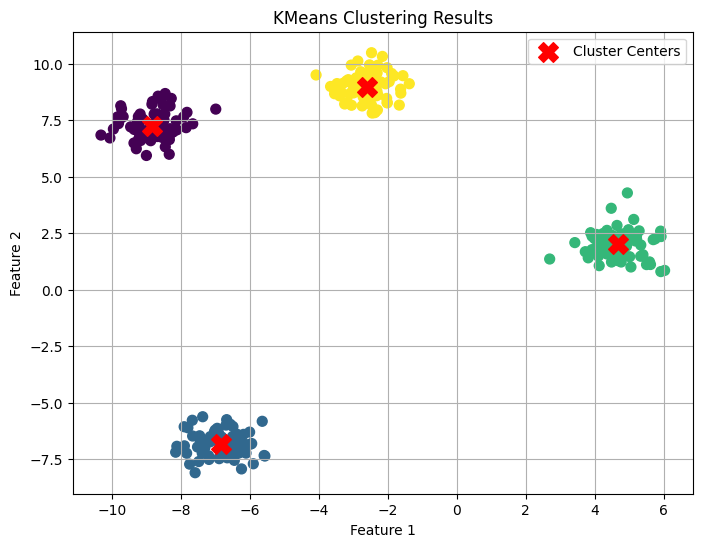

In [1]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 2: Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Step 4: Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', s=200, marker='X', label='Cluster Centers')
plt.title('KMeans Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

### 7. Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).

In [2]:
# Step 1: Import libraries
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Step 2: Load the Wine dataset
data = load_wine()
X = data.data

# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled)

# Step 5: Count clusters (excluding noise label -1)
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Step 6: Print the number of clusters
print(f"Number of clusters found (excluding noise): {n_clusters}")

Number of clusters found (excluding noise): 0


### 8. Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.

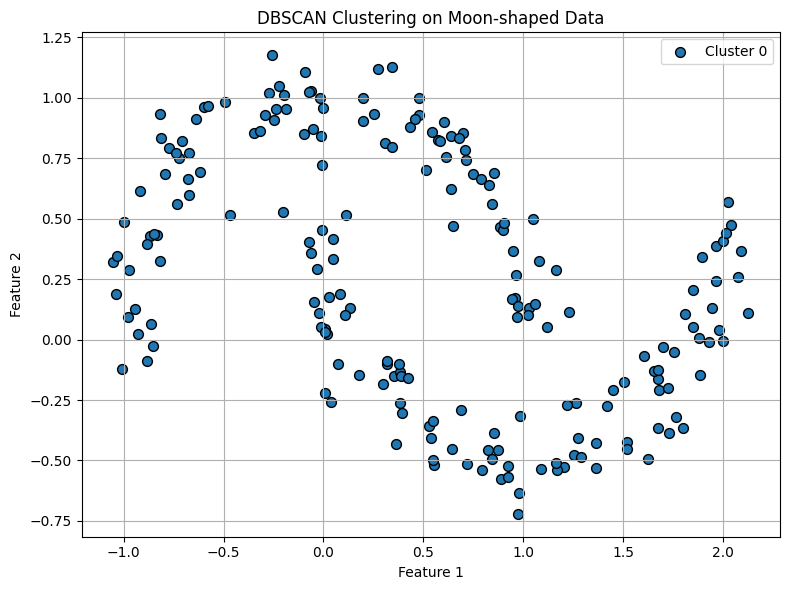

In [6]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate moon-shaped synthetic data
X, _ = make_moons(n_samples=200, noise=0.1, random_state=1)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

# Set up colors for clusters
unique_labels = set(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))

# Plot clusters and outliers
plt.figure(figsize=(8, 6))
for label, color in zip(unique_labels, colors):
    if label == -1:
        # Outliers in bold black ×
        plt.scatter(X[labels == label, 0], X[labels == label, 1],
                    c='black', marker='x', s=100, label='Outliers')
    else:
        # Clustered points
        plt.scatter(X[labels == label, 0], X[labels == label, 1],
                    c=[color], label=f'Cluster {label}', s=50, edgecolors='k')

plt.title('DBSCAN Clustering on Moon-shaped Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 9. Load the Wine dataset, reduce it to 2D using PCA, then apply Agglomerative Clustering and visualize the result in 2D with a scatter plot.

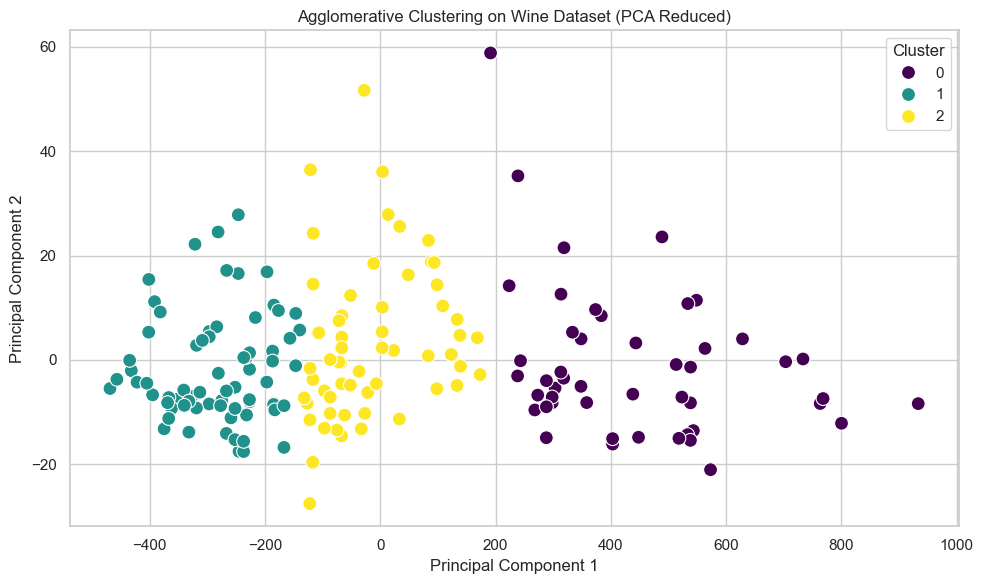

In [7]:
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Step 2: Load the Wine dataset
data = load_wine()
X = data.data

# Step 3: Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 4: Apply Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=3)
labels = cluster.fit_predict(X_pca)

# Step 5: Create a DataFrame for visualization
df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df['Cluster'] = labels

# Step 6: Plot the clusters
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('Agglomerative Clustering on Wine Dataset (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

### 10. You are working as a data analyst at an e-commerce company. The marketing team wants to segment customers based on their purchasing behavior to run targeted promotions. The dataset contains customer demographics and their product purchase history across categories.
Describe your real-world data science workflow using clustering:
- Which clustering algorithm(s) would you use and why?
- How would you preprocess the data (missing values, scaling)?
- How would you determine the number of clusters?
- How would the marketing team benefit from your clustering analysis?

### Clustering Workflow for Customer Segmentation

As a data analyst at an e-commerce company, the goal is to segment customers based on purchasing behavior to enable targeted marketing. Here's the step-by-step workflow:

#### 1. Choosing Clustering Algorithm

- **KMeans** is ideal for large datasets with well-separated clusters.
- **DBSCAN** is useful for detecting noise and irregular cluster shapes.
- **Agglomerative Clustering** helps when visualizing customer relationships via dendrograms.

```python
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
```

---

#### 2. Data Preprocessing

- **Handle missing values** via imputation or removal.
- **Scale features** using `StandardScaler` to ensure fair distance calculations.
- **Encode categorical variables** using one-hot or label encoding.

```python
from sklearn.preprocessing import StandardScaler
df = df.dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include='number'))
```

---

#### 3. Determining Number of Clusters

- Use **Elbow Method** to find optimal `k` for KMeans.
- Use **Silhouette Score** to evaluate cluster quality.
- Use **Dendrograms** for hierarchical clustering.

```python
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
```

---

#### 4. Business Impact for Marketing

- **Targeted promotions** for high-value or dormant customers.
- **Personalized recommendations** based on cluster behavior.
- **Retention strategies** for at-risk segments.
- **Optimized ad spend** by focusing on profitable clusters.

```python
df['Cluster'] = KMeans(n_clusters=4).fit_predict(scaled_data)
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)
```